# Synthetic Dataset Creation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
n_features = 20   # Total number of features
n_meaningful = 2  # Number of meaningful features

## Train set

In [28]:
# Parameters
n_regular = 1000  # Number of regular data points
n_anomalous = 50  # Number of anomalous data points

# Generate regular data
rho_regular = np.random.uniform(0, 3, n_regular)
theta_regular = np.random.uniform(0, 2 * np.pi, n_regular)
meaningful_regular = np.column_stack((rho_regular * np.cos(theta_regular), 
                                      rho_regular * np.sin(theta_regular)))

# Generate anomalous data
rho_anomalous = np.random.uniform(4, 30, n_anomalous)
theta_anomalous = np.random.uniform(0, 2 * np.pi, n_anomalous)
meaningful_anomalous = np.column_stack((rho_anomalous * np.cos(theta_anomalous), 
                                        rho_anomalous * np.sin(theta_anomalous)))

# Combine meaningful features
meaningful_features = np.vstack((meaningful_regular, meaningful_anomalous))

# Generate noise features
noise_features = np.random.normal(0, 1, (n_regular + n_anomalous, n_features - n_meaningful))

# Combine meaningful and noise features
data = np.hstack((meaningful_features, noise_features))

# Create labels (0 for regular, 1 for anomalous)
labels = np.array([0] * n_regular + [1] * n_anomalous)

columns = [f"Feature_{i+1}" for i in range(n_features)]
train_df = pd.DataFrame(data, columns=columns)
train_df['Label'] = labels

print(train_df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.689467   2.268561   0.312673  -0.007688   0.544998   0.836429   
1  -1.940829  -0.801937   0.604095  -1.416217  -0.149079  -0.215419   
2  -1.312327  -2.563012  -0.984244  -1.017587   0.440182   0.274530   
3   1.484128  -1.343371   0.442766   0.028727   0.058446  -1.072997   
4  -0.003655   0.007646  -0.765424  -0.297545  -0.372809  -0.306207   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0  -0.314344  -0.137083  -0.587465    0.329248  ...   -0.908560    0.375471   
1  -1.102057   0.212679  -1.029164    0.438481  ...    0.676017   -0.549904   
2   0.055639   1.214598   1.196206    0.563815  ...   -0.963852    0.552246   
3  -2.181085   0.396642  -0.873556   -0.894247  ...    0.611403   -0.190768   
4   1.070018   0.333564   3.670770    0.075562  ...    0.774156   -1.273892   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0   -0.100670   -0.59

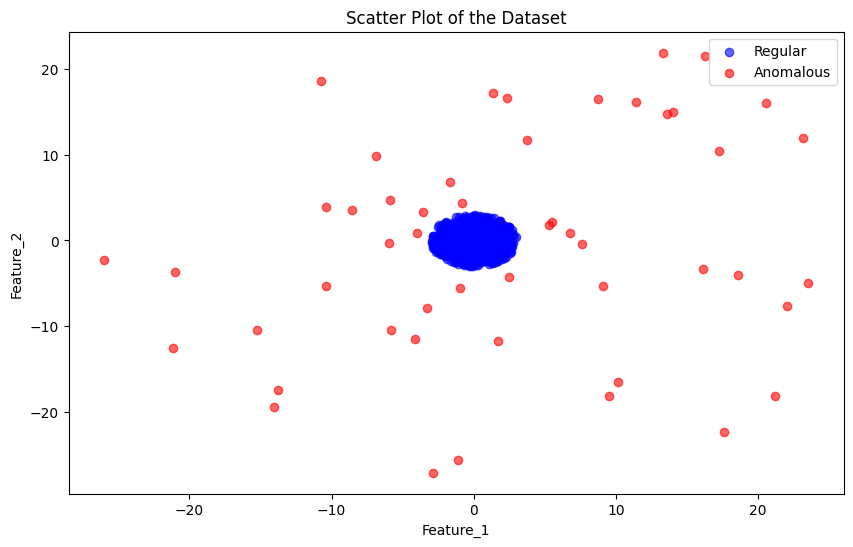

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df[train_df['Label'] == 0]['Feature_1'], train_df[train_df['Label'] == 0]['Feature_2'], 
            label='Regular', alpha=0.6, c='blue')
plt.scatter(train_df[train_df['Label'] == 1]['Feature_1'], train_df[train_df['Label'] == 1]['Feature_2'], 
            label='Anomalous', alpha=0.6, c='red')

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.show()

In [33]:
train_set = np.column_stack((data, labels))
tr_save = pd.DataFrame(train_set)

# print(tr_save.head())

tr_save.to_pickle("dataset/syn_train.pkl")

## Test set

In [20]:
# Parameters
n_anomalous_test = 200  # Number of anomalous data points in the test set

# Generate anomalous test data
rho_anomalous_test = np.random.uniform(4, 30, n_anomalous_test)
theta_anomalous_test = np.random.uniform(0, 2 * np.pi, n_anomalous_test)
meaningful_anomalous_test = np.column_stack((rho_anomalous_test * np.cos(theta_anomalous_test), 
                                             rho_anomalous_test * np.sin(theta_anomalous_test)))

# Generate noise features for the test set
noise_features_test = np.random.normal(0, 1, (n_anomalous_test, n_features - n_meaningful))

# Combine meaningful and noise features for the test set
data_test = np.hstack((meaningful_anomalous_test, noise_features_test))

# Create labels for the test set (0 for regular, 1 for anomalous)
labels_test = np.array([1] * n_anomalous_test)

columns = [f"Feature_{i+1}" for i in range(n_features)]
df_test = pd.DataFrame(data_test, columns=columns)
df_test['Label'] = labels_test

print(df_test.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  20.572482 -18.692509   0.085772   0.640056  -0.610015  -0.198095   
1   6.177598  -7.607946  -0.628267   0.356154  -2.200175   0.991411   
2  -0.546993  18.770789  -0.047290  -1.033015   0.048000   0.365592   
3   4.070771  26.910013   1.439008  -1.550048  -0.648773  -0.217858   
4   1.899771 -14.427159   0.217925  -0.668719   0.722901  -1.561687   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0   0.136567  -1.951604   0.333507    1.327807  ...   -0.228350   -0.320358   
1   1.424002  -0.020865   0.412260   -0.118935  ...   -0.702045    1.020430   
2   0.531014   2.245209   0.975652    0.625141  ...   -1.895046   -1.627903   
3   0.295734   0.328904  -0.870299    1.812987  ...   -0.719437    0.160728   
4  -0.071034  -0.987516  -0.765615    1.002172  ...    0.177291   -0.872050   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0   -0.196866   -0.39

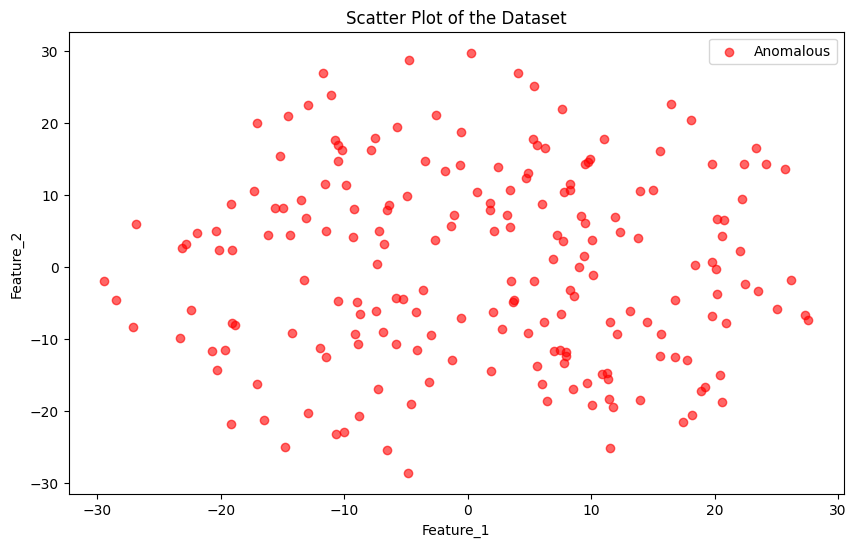

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df_test[df_test['Label'] == 1]['Feature_1'], df_test[df_test['Label'] == 1]['Feature_2'], 
            label='Anomalous', alpha=0.6, c='red')

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.show()

In [ ]:
test_set = np.column_stack((data_test, labels_test))
te_save = pd.DataFrame(test_set)

te_save.to_pickle("dataset/syn_test.pkl")